In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns


import pandas as pd

In [6]:
csv = pd.read_csv("./PLOTS - Sheet2.csv")

In [7]:
csv

,Representation Size,R50-Rand-LP,R50-SVD,R50-FF,R50-NRL,R50-NRL-E,SLIM
0,8.0,4.56,2.34,65.29,66.63,56.66,0.42
1,16.0,11.29,7.17,72.85,73.53,71.94,0.96
2,32.0,27.21,20.46,74.60,75.03,74.48,2.27
3,64.0,49.47,48.10,75.27,75.82,75.35,5.59
4,128.0,65.70,67.24,75.29,76.30,75.80,14.15
5,256.0,72.43,74.59,75.71,76.47,76.22,38.42
6,512.0,74.94,76.78,76.18,76.65,76.36,69.80
7,1024.0,76.10,76.87,76.63,76.76,76.48,74.61
8,2048.0,76.87,NaN,76.87,76.80,76.51,76.26


R50-NRL
R50-NRL-E
R50-FF
R50-SVD
SLIM
R50-Rand-LP


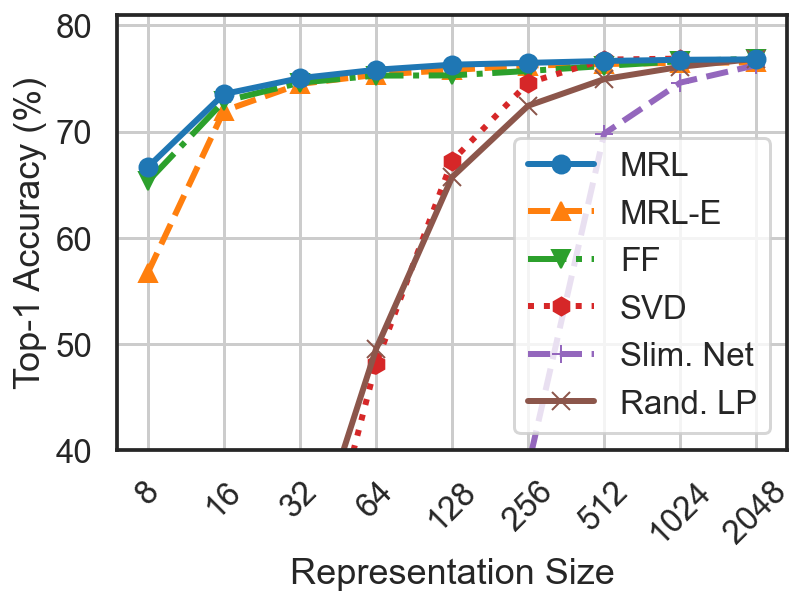

In [9]:
import numpy as np

names = {
    "R50-NRL": "MRL",
    "R50-NRL-E": "MRL-E",
    "R50-FF": "FF",
    "R50-SVD": "SVD",
    "SLIM":"Slim. Net",
    "R50-Rand-LP": "Rand. LP"
}
sns.set_context('talk')
sns.set_style("white")
linestyles = ['-', '--', '-.', ':', "--", "-", ":", "-."]
markers = ['o', '^', 'v', 'h', '+', 'x', 'D', '*']

for i, ((name, mapping), linestyle, m) in enumerate(zip(names.items(), linestyles, markers)):
    print(name)
    if name == "R50-NRL":
        zorder = 30
    else:
        zorder = 2
    plt.plot(
        csv["Representation Size"], csv[name], label=mapping, marker=m, linewidth=3, linestyle=linestyle, zorder=zorder
    )

plt.ylim([40, 81])
plt.xscale("log")
plt.xticks(csv["Representation Size"], csv["Representation Size"].astype(int), rotation=45)
plt.xlabel("Representation Size")
plt.ylabel("Top-1 Accuracy (%)")
plt.grid()
plt.legend()

plt.savefig("classification-dim-x-acc.pdf", bbox_inches="tight")

In [49]:
np.log2(csv["Representation Size"])

0     3.0
1     4.0
2     5.0
3     6.0
4     7.0
5     8.0
6     9.0
7    10.0
8    11.0
Name: Representation Size, dtype: float64